In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import copy
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import re

In [2]:
dependent_variable_name = 'SalePrice'

In [3]:
df_train = pd.read_csv('train.csv', index_col=False)
df_test = pd.read_csv('test.csv', index_col=False)

In [4]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
def drop_columns(df:pd.DataFrame):
    df_copy = copy.copy(df)
    return df_copy.drop(['Id', 'MiscVal'], axis=1)

In [7]:
df_train = drop_columns(df_train)

## Imputing Missing Values
Below are the all features along with their corresponding number of missing values, arranged in descending order.

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train.isnull().sum().sort_values(ascending=False))


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageYrBlt        81
GarageQual         81
GarageCond         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtFinType1       37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
BedroomAbvGr        0
BsmtHalfBath        0
FullBath            0
KitchenAbvGr        0
HalfBath            0
Functional          0
Fireplaces          0
KitchenQual         0
TotRmsAbvGrd        0
MSSubClass          0
GrLivArea           0
GarageCars          0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC           0
LowQualFin

### Interpretation
Since all features related to the garage have the same number of missing values, presumably a null value indicates that the house does not have a garage. Presence of a garage will likely change the price of the house. Therefore, the missing values of these columns should NOT be imputed with the mean or mode as the model would then not be able to use information relating to the 'presence of a garage'. Instead, they will be imputed to 'Not present' (since they are all categorical features) so that hopefully the model can interpret this.

Similar logic will be applied for features related to the:
- basement (Bsmt)
- fence
- alley
- fireplace
- pool

These features are selected using the following regular expression: 

In [9]:
regex_impute_pattern = 'Alley|Fence|Garage|Bsmt|Fireplace|Pool'

In [10]:
columns_to_impute = [column for column in df_train.columns if re.search(regex_impute_pattern, column) and df_train[column].dtype == 'object']
columns_to_impute

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [11]:
def is_value_null(value):
    if pd.isna(value):
        return 'Not present'
    else:
        return value

In [12]:
def impute_columns_relating_to_presence_of_house_features(df:pd.DataFrame):
    columns_to_impute = [column for column in df.columns if re.search(regex_impute_pattern, column) and df[column].dtype == 'object']
    for column in columns_to_impute:
        df[column] = df[column].apply(is_value_null)

In [13]:
impute_columns_relating_to_presence_of_house_features(df_train)

The rest of the null values are imputed as follows:
- Null values for categorical features are imputed with the mode
- Null values for numerical features are imputed with the mean

In [14]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

def impute_missing_values_in_df_subset(df: pd.DataFrame, imputer: SimpleImputer, datatype:str):
    df_subset = df.select_dtypes(datatype)
    df_subset_imputed = imputer.fit_transform(df_subset)
    return pd.DataFrame(df_subset_imputed, columns = df_subset.columns)

def impute_missing_values_in_df(df: pd.DataFrame):
    df_categorical = impute_missing_values_in_df_subset(df, mode_imputer, 'object')
    df_numerical = impute_missing_values_in_df_subset(df, mean_imputer, 'number')

    return pd.concat([df_categorical, df_numerical], axis=1)

In [15]:
df_train = impute_missing_values_in_df(df_train)
df_test = impute_missing_values_in_df(df_test)

### Distinguishing between continuous and discrete features
Continuous features, i.e. those which can be represented by varying levels of precision, are those relating to:
- the area of rooms in square feet; most of these contain the expression of 'Area' or 'SF' (square feet). Those that don't are EnclosedPorch, 3SsnPorch and ScreenPorch which are accessed with the expression 'Porch'.
- the linear feet of street connected to the property (LotFrontage)

The regular expression used to access these is shown below:

In [16]:
regex_pattern = 'Area|SF|SalePrice|Porch|LotFrontage'

In [17]:
continuous_features = [column for column in df_train.columns if re.search(regex_pattern, column)]
categorical_features = [column for column in df_train.columns if column not in continuous_features]

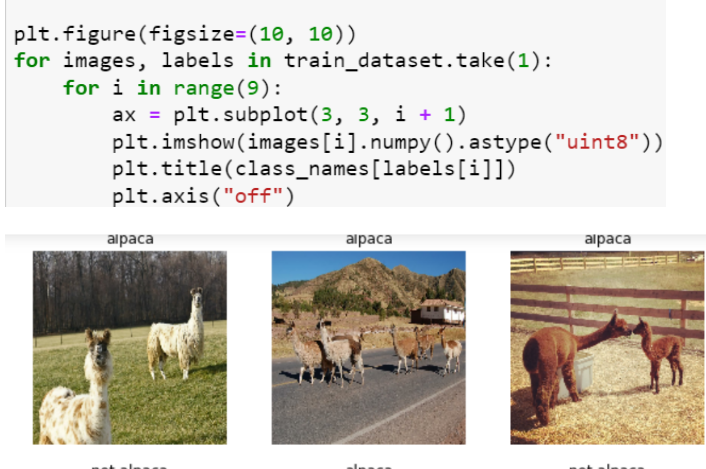

In [18]:
def initialize_plotting_variables(feature_names: list):
    cur_col = 1
    cur_row = 1

    num_features = len(feature_names)

    num_cols = 2
    if num_features % 2 == 0:
        num_rows = num_features // 2
    else:
        num_rows = num_features // 2 + 1

    fig, ax = plt.subplots(nrows = num_rows, ncols=num_cols, figsize=(20,num_features*5))

    return cur_col, cur_row, num_features, num_cols, num_rows, fig, ax

In [19]:
def increment_row_and_col(cur_col, cur_row, num_cols):
    if cur_col % num_cols == 0:
        cur_row += 1
        cur_col = 1
    else:
        cur_col += 1

    return cur_col, cur_row

## Plotting distribution of features

# WHAT DO THESE PLOTS SHOW?

In [20]:
def plot_distribution_of_features(categorical_bool:bool, feature_names:list, df:pd.DataFrame):
    
    cur_col, cur_row, num_features, num_cols, num_rows, fig, ax = initialize_plotting_variables(feature_names)

    for i in range(num_features):

        feature = feature_names[i]
        current_ax = ax[cur_row-1, cur_col-1]
        current_ax.set_title(f'Feature: {feature}', fontsize=20)
        current_ax.set_ylabel('Number of occurrences', fontsize=14)

        if categorical_bool == True:
            value_counts = df[feature].value_counts()

            feature_data_type = df[feature].dtype
            if feature_data_type == 'float64':
                value_counts = value_counts.sort_index(ascending=True)
            else:
                if len(value_counts.index) > 10:
                    current_ax.set_xticklabels(value_counts.index, rotation=90)
            current_ax.bar(x=value_counts.index, height=value_counts.values)

        if categorical_bool == False:
            current_ax.hist(x=df[feature], bins=20)
        
        cur_col, cur_row = increment_row_and_col(cur_col, cur_row, num_cols)

## Plotting distribution of features
### Disrete Features

C:\Users\Charlie\AppData\Local\Temp\ipykernel_34328\3949541884.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_ax.set_xticklabels(value_counts.index, rotation=90)
C:\Users\Charlie\AppData\Local\Temp\ipykernel_34328\3949541884.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_ax.set_xticklabels(value_counts.index, rotation=90)
C:\Users\Charlie\AppData\Local\Temp\ipykernel_34328\3949541884.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_ax.set_xticklabels(value_counts.index, rotation=90)


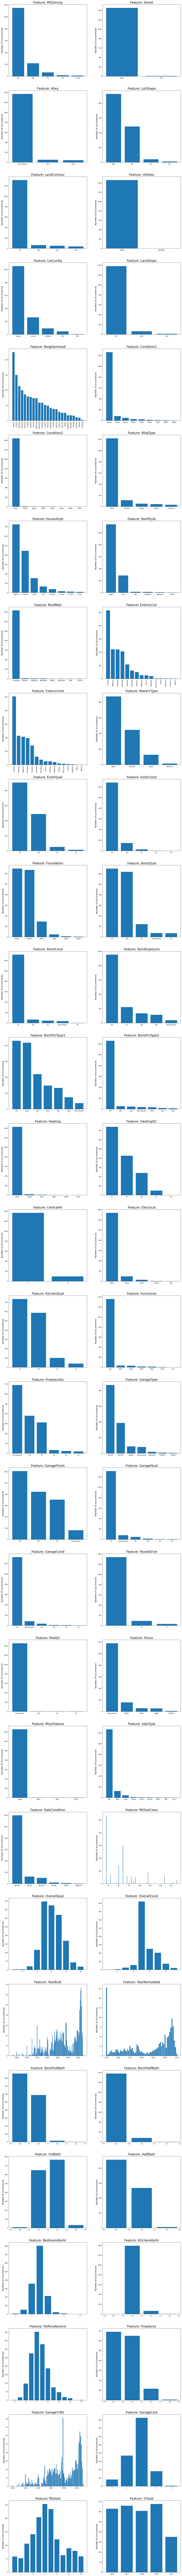

In [21]:
plot_distribution_of_features(categorical_bool=True, feature_names=categorical_features, df=df_train)

## Plotting distribution of features
### Continuous Features

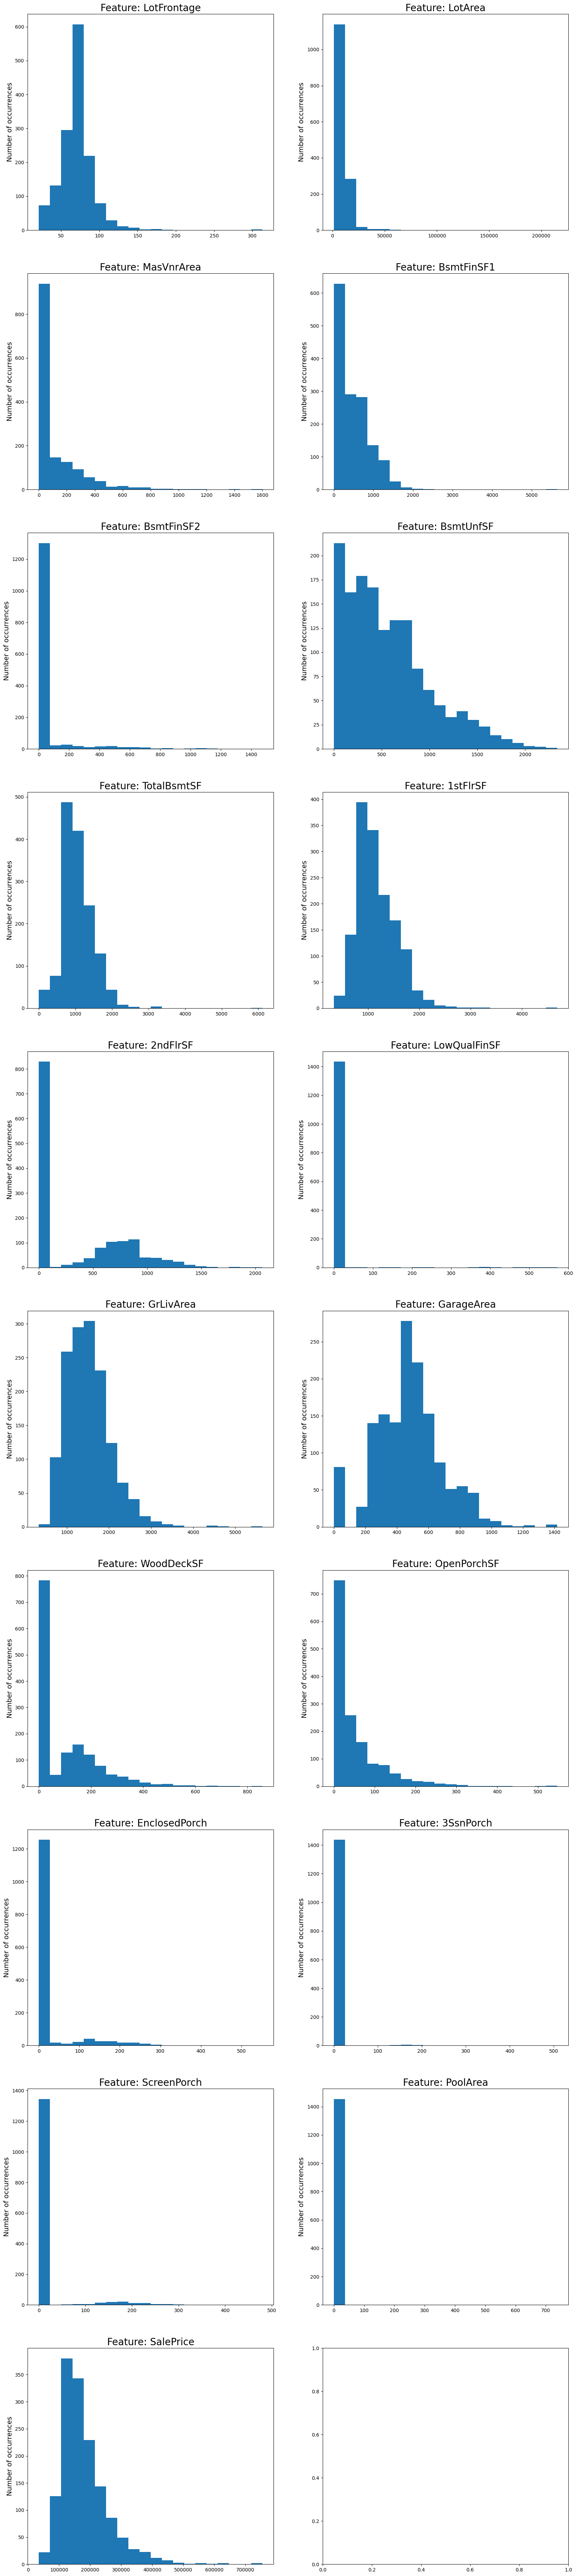

In [22]:
plot_distribution_of_features(categorical_bool=False, feature_names=continuous_features, df=df_train)

## Plotting variation of dependent variable with feature values 

In [23]:
def plot_variation_of_dependent_variable_with_feature_values(categorical_bool:bool, feature_names:list, df:pd.DataFrame, dependent_variable_name:str):

    cur_col, cur_row, num_features, num_cols, num_rows, fig, ax = initialize_plotting_variables(feature_names)

    for i in range(num_features):
        feature = feature_names[i]
        current_ax = ax[cur_row-1, cur_col-1]
        current_ax.set_title(f'Feature: {feature}', fontsize=20)

        if categorical_bool == True:
            current_ax.set_ylabel(f'Average {dependent_variable_name}', fontsize=14)
            unique_feature_values = df[feature].unique()

            feature_data_type = df[feature].dtype
            
            average_value_of_dependent_variable_for_each_feature_value_dict = {value: df[df[feature] == value][dependent_variable_name].mean() for value in unique_feature_values}
            if feature_data_type == 'float64':
                series = pd.Series(average_value_of_dependent_variable_for_each_feature_value_dict).sort_index(ascending=True)
            else:
                series = pd.Series(average_value_of_dependent_variable_for_each_feature_value_dict).sort_values(ascending=False)
                if len(unique_feature_values) > 10:
                    current_ax.set_xticklabels(unique_feature_values, rotation=90)
            current_ax.bar(x=series.index, height=series.values)

        if categorical_bool == False:
            current_ax.set_ylabel(f'{dependent_variable_name}', fontsize=14)
            current_ax.scatter(x=df[feature], y=df[dependent_variable_name])

        cur_col, cur_row = increment_row_and_col(cur_col, cur_row, num_cols)

## Plotting variation of dependent variable with feature values 
### Discrete Features

C:\Users\Charlie\AppData\Local\Temp\ipykernel_34328\1256948962.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_ax.set_xticklabels(unique_feature_values, rotation=90)
C:\Users\Charlie\AppData\Local\Temp\ipykernel_34328\1256948962.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_ax.set_xticklabels(unique_feature_values, rotation=90)
C:\Users\Charlie\AppData\Local\Temp\ipykernel_34328\1256948962.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_ax.set_xticklabels(unique_feature_values, rotation=90)


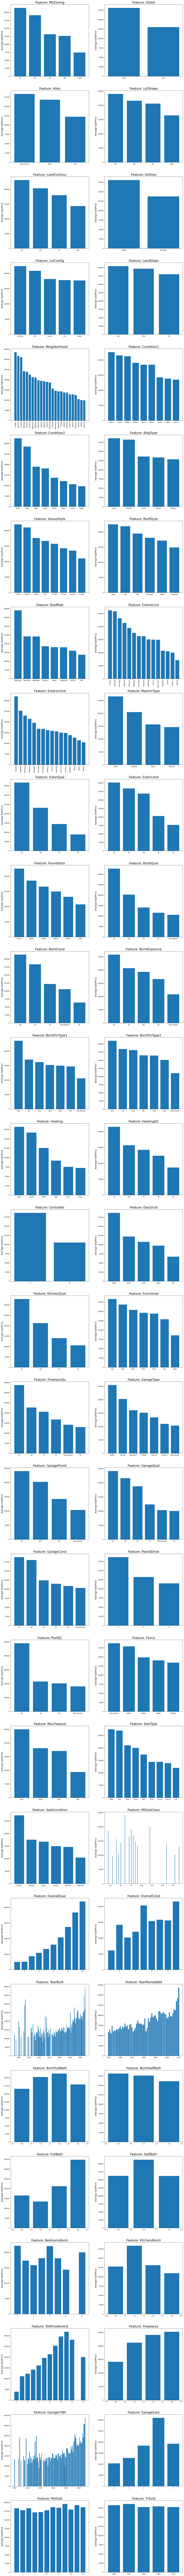

In [24]:
plot_variation_of_dependent_variable_with_feature_values(categorical_bool=True, feature_names=categorical_features, df=df_train, dependent_variable_name=dependent_variable_name)

## Plotting variation of dependent variable with feature values 
### Continuous Features

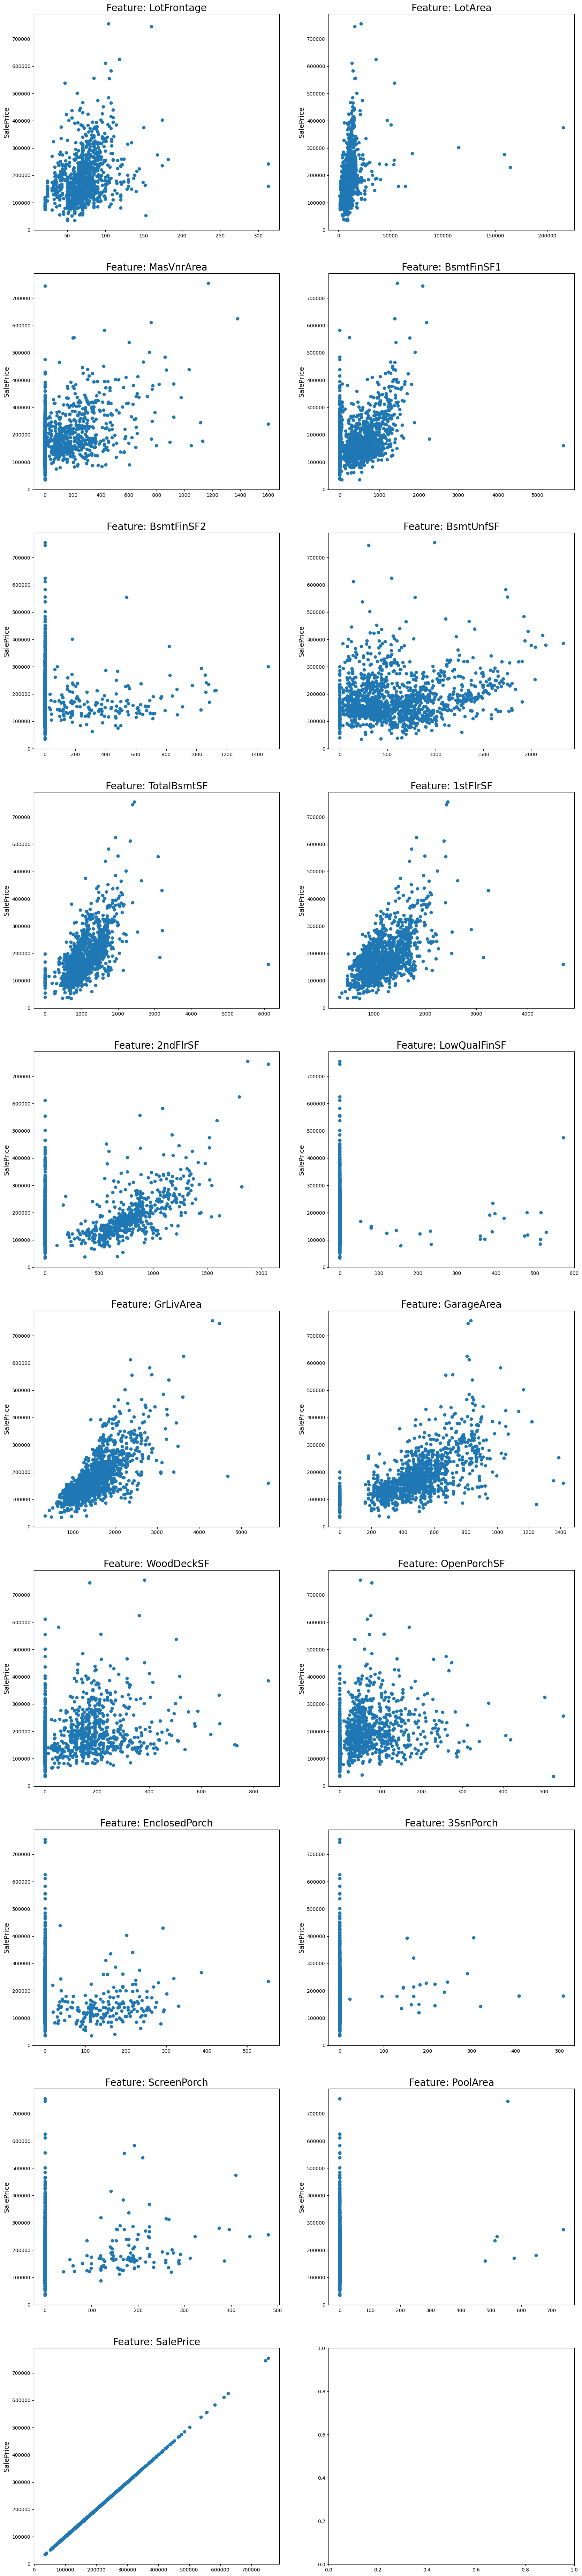

In [25]:
plot_variation_of_dependent_variable_with_feature_values(categorical_bool=False, feature_names=continuous_features, df=df_train, dependent_variable_name=dependent_variable_name)

# Feature Engineering

Ideas for feature engineering:
- Add the average price of houses for the decade it was built?, the year the garage was built etc
- Add the number of items not present

NOTE:
- only considers houses sold over a 5 year period so inflation not huge impactor

In [26]:
def feature_engineering(df:pd.DataFrame):
    area_regular_expression = 'Area|SF|Porch'
    area_columns = [column for column in df.columns if re.search(area_regular_expression, column)]

    df['TotalArea'] = 0
    
    for area_column in area_columns:
        df['TotalArea'] += df[area_column]
    
    df['SumOfQualities'] = df.BsmtQual + df.ExterQual + df.KitchenQual

    return df

df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [27]:
def encode_categorical_data(data:pd.DataFrame):
    for col in data.select_dtypes('object'):
        data[col], _ = data[col].factorize()
    return data

In [28]:
df_train_encode = encode_categorical_data(df_train)
df_test_encode = encode_categorical_data(df_test)

In [29]:
model = RandomForestRegressor()

df_train_shallow_copy = copy.copy(df_train_encode)
y = df_train_shallow_copy.pop('SalePrice')
X = df_train_shallow_copy
X_test = drop_columns(df_test)

In [30]:
def compute_mutual_information(X, y):
    discrete_features = X.dtypes == int
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, index=X.columns)
    return mi_scores.sort_values(ascending=False)

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(compute_mutual_information(X, y))

OverallQual       0.565698
Neighborhood      0.491852
GrLivArea         0.482873
SumOfQualities    0.425687
GarageArea        0.370314
GarageCars        0.367647
TotalBsmtSF       0.367547
YearBuilt         0.361716
TotalArea         0.354715
KitchenQual       0.331767
BsmtQual          0.320971
ExterQual         0.317946
1stFlrSF          0.307870
GarageYrBlt       0.291963
MSSubClass        0.276412
FullBath          0.261542
GarageFinish      0.251307
YearRemodAdd      0.243792
TotRmsAbvGrd      0.222729
FireplaceQu       0.217264
2ndFlrSF          0.199720
LotFrontage       0.199192
Foundation        0.197909
GarageType        0.197479
HeatingQC         0.176070
Fireplaces        0.161444
LotArea           0.158365
Exterior2nd       0.155525
BsmtFinType1      0.153814
BsmtFinSF1        0.151543
OpenPorchSF       0.146742
MSZoning          0.133468
BsmtUnfSF         0.120592
Exterior1st       0.116508
OverallCond       0.112562
WoodDeckSF        0.108490
LotShape          0.097690
M

In [32]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.33, random_state=42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_cv_predict = model.predict(X_cv)

In [33]:
def compute_rmse(y, y_predict):
    n = len(y)
    return np.sqrt(1 / n * np.sum([(y_predict[i] - y[i]) ** 2 for i in range(n)]))

In [34]:
compute_rmse(y_train.values, y_train_predict)

11018.675012452022

In [35]:
compute_rmse(y_cv.values, y_cv_predict)

30877.68880468399

In [36]:
y_test_predict = model.predict(X_test)

In [37]:
df_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': y_test_predict})
df_submission.set_index('Id', inplace=True)

In [38]:
df_submission.to_csv('submission.csv')